In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

## 1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
#Очевидно, что данные необходимо масштабировать. 
#На уроке разобрались, что для данной выборки эффективней стандартизация

def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [5]:
X_st = X.copy().astype(np.float64) #тип float чтоб не потерять значения после запятой в результате масштабирования

X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

4.4408920985006264e-17
1.0


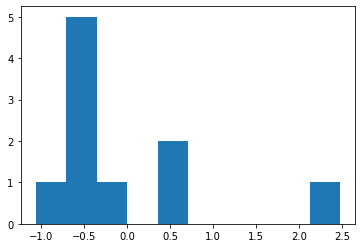

In [6]:
print(np.mean(X_st[:, 1]))
print(np.std(X_st[:, 1]))

plt.hist(X_st[:, 1])
plt.show()

-4.163336342344337e-17
0.9999999999999999


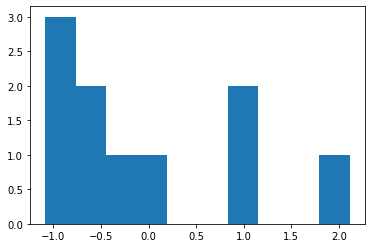

In [7]:
print(np.mean(X_st[:, 2]))
print(np.std(X_st[:, 2]))

plt.hist(X_st[:, 2])
plt.show()

In [8]:
#после масштабирования можно приступать к L2 регуляризации

In [9]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [14]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg #дополнительное слагаемое
        
        #три строчки закомментила, чтоб не выводились при построении графика ниже
        #if i % (iterations / 10) == 0:                                  
            #print(f'Iter: {i}, weights: {W}, error {err}')

    #print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [15]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [0.44072835 0.96257825 0.01135226 0.78155844], error 3408.2030089796617
Iter: 500, weights: [56.21673105  5.92987184  1.02914821  5.48658891], error 25.318884358449118
Iter: 1000, weights: [56.21890539  6.14452025  0.23872773  6.09047924], error 25.04684004743756
Iter: 1500, weights: [ 5.62189055e+01  6.20200929e+00 -2.68489372e-02  6.30732374e+00], error 25.003567785508736
Iter: 2000, weights: [56.21890547  6.22091239 -0.11752492  6.38205224], error 24.994465414715094
Iter: 2500, weights: [56.21890547  6.22734602 -0.14855605  6.40765954], error 24.992017338036042
Iter: 3000, weights: [56.21890547  6.22954673 -0.15917901  6.41642739], error 24.99125748546356
Iter: 3500, weights: [56.21890547  6.23030006 -0.16281576  6.41942913], error 24.99100651739522
Iter: 4000, weights: [56.21890547  6.23055796 -0.16406081  6.42045678], error 24.99092167262282
Iter: 4500, weights: [56.21890547  6.23064625 -0.16448705  6.4208086 ], error 24.990892751840423
Final MSE: 24.990882865536

array([56.21890547,  6.23067644, -0.16463281,  6.42092891])

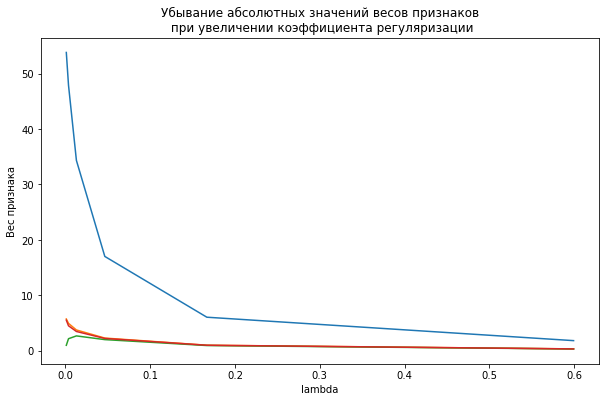

In [12]:
n = 10

coeffs = np.zeros((n, X_st.shape[1]))
lambda_list = np.logspace(-3, 2, n)


for i, val in enumerate(lambda_list):
    weights = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=val)
    coeffs[i, :] = weights


plt.figure(figsize=(10, 6))
for i in range(X_st.shape[1]):
    plt.plot(lambda_list, coeffs[:, i])

    
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации')
plt.xlabel('lambda')
plt.ylabel('Вес признака');

## 2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.**

In [20]:
#отличается от gradient_descent_reg_l2, тем, что берем производную от L1 для нахождение градиента регуляризации
#посмотрела разбор нахождения производной модуля (\х\)' = x / \х\
#в нашем случае производная L1 = np.sign(w)

def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [25]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 2.38277211 -0.15634114 -0.39508947  0.07895278], error 3235.812843493489
Iter: 500, weights: [56.4927801   5.93241833  1.05763996  5.47273045], error 25.24938309020029
Iter: 1000, weights: [56.49499991  6.1927292   0.14425101  6.15888042], error 24.949063882156533
Iter: 1500, weights: [56.495       6.25228033 -0.14575198  6.40267364], error 24.912384444520647
Iter: 2000, weights: [56.495       6.271622   -0.24238941  6.48308136], error 24.906893295065835
Iter: 2500, weights: [56.495       6.27880704 -0.27724334  6.51188251], error 24.905727009482952
Iter: 3000, weights: [56.495       6.28140465 -0.28979231  6.52224203], error 24.90541229194535
Iter: 3500, weights: [56.495       6.28234023 -0.29430938  6.52597048], error 24.90531263171249
Iter: 4000, weights: [56.495       6.28267701 -0.29593528  6.52731249], error 24.905278524705825
Iter: 4500, weights: [56.495       6.28279823 -0.2965205   6.52779553], error 24.905266476843412
Final MSE: 24.905262169943406


array([56.495     ,  6.28284181, -0.29673091,  6.5279692 ])

## 3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?**

Можно. Мы это нагладно увидели на уроке в блоке с написанием ручного СГД.
Для признаков сначала произвели стандатизацию, потом нормализацию.
Опытным путем определили, что данные остаются отмасштабированы по тому методу, который применялся последним.
Также экспериметально доказали, что результат каждого из методов не зависит от порядка проведения манипуляций и остается неизменным

## 4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.**

In [61]:
from sklearn import datasets
#генерируем датасет при помощи datasets.make_regression c необходимыми параметрами
X, Y, coef = datasets.make_regression(n_samples=10000, n_features=10, n_informative=10, n_targets=1, noise=5, coef=True, random_state=2)
display(X, Y, coef)

array([[ 2.79991373, -0.23878848, -0.1616545 , ...,  0.13844999,
        -0.3947617 , -0.70449625],
       [ 0.50465858, -0.41874589,  0.94716092, ...,  0.81894855,
         0.54858801, -1.08665009],
       [-0.14185981,  0.33922013, -0.10050688, ...,  0.2576539 ,
        -0.40157571, -0.45532256],
       ...,
       [ 0.23874126, -1.12870995,  0.87101784, ..., -0.83874975,
        -0.4349091 ,  0.73131071],
       [ 0.07155669, -1.17557635, -1.06548531, ..., -0.71275822,
         0.3757582 ,  0.11763615],
       [ 1.57965378,  0.09816231,  0.54527157, ..., -1.50588059,
         0.23868286, -1.37290539]])

array([  32.51972903, -107.29380561,  197.05308783, ..., -318.12106876,
       -259.8286481 ,  -18.5429747 ])

array([11.09304905, 91.14909711, 39.98668478, 90.70102586, 67.17039651,
       43.30949683,  8.98836563, 24.05835053, 11.35058557, 19.15750707])

In [62]:
X.shape

(10000, 10)

In [63]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

X[0, :] = standard_scale(X[0, :])

X

array([[ 2.48394937, -0.38694104, -0.31406677, ..., -0.0305355 ,
        -0.53430066, -0.82693017],
       [ 0.50465858, -0.41874589,  0.94716092, ...,  0.81894855,
         0.54858801, -1.08665009],
       [-0.14185981,  0.33922013, -0.10050688, ...,  0.2576539 ,
        -0.40157571, -0.45532256],
       ...,
       [ 0.23874126, -1.12870995,  0.87101784, ..., -0.83874975,
        -0.4349091 ,  0.73131071],
       [ 0.07155669, -1.17557635, -1.06548531, ..., -0.71275822,
         0.3757582 ,  0.11763615],
       [ 1.57965378,  0.09816231,  0.54527157, ..., -1.50588059,
         0.23868286, -1.37290539]])

In [64]:
# SGD
def stohastic_gradient_descent(X, Y, iterations, eta=1e-4, size=1):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        train_ind = np.random.randint(X.shape[0], size=size)

        y_pred = np.dot(X[train_ind], W)
        W = W - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        error = calc_mse(Y, np.dot(X, W))
        errors.append(error)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {error}')
    
    print(f'Final MSE: {calc_mse(Y, np.dot(X, W))}')
    return W, errors, w_list

In [65]:
# GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {err}')
        
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [66]:
%%time 
weights_GD, errors_GD, w_list_GD = gradient_descent(X, Y, iterations=5000, eta=1e-3) 
#отчет о времени, которое потрачено на выполнение
#сохраняем значения, которые возвращает функция в переменные

Iter: 0, error 26334.726697773982
Iter: 500, error 3474.5154495326447
Iter: 1000, error 478.2904207315703
Iter: 1500, error 85.16763401995465
Iter: 2000, error 33.53238837764756
Iter: 2500, error 26.74295954127944
Iter: 3000, error 25.849254912312613
Iter: 3500, error 25.731485246087928
Iter: 4000, error 25.715948626413905
Iter: 4500, error 25.71389666896584
Final MSE: 25.713625353810606
Wall time: 3.95 s


In [67]:
%%time
weights_SGD, errors_SGD, w_list_SGD = stohastic_gradient_descent(X, Y, iterations=5000, eta=1e-3)
#отчет о времени, которое потрачено на выполнение
#сохраняем значения, которые возвращает функция в переменные

Iter: 0, error 26562.648514899352
Iter: 500, error 3459.428036039506
Iter: 1000, error 546.3640778902477
Iter: 1500, error 94.87242355272265
Iter: 2000, error 34.16116884377604
Iter: 2500, error 26.995393368717526
Iter: 3000, error 26.175015731068683
Iter: 3500, error 25.90925874973284
Iter: 4000, error 26.105461766025808
Iter: 4500, error 25.828435253615673
Final MSE: 25.98601232097632
Wall time: 2.52 s


In [82]:
#SGD справилась быстрее, MSE чуть больше

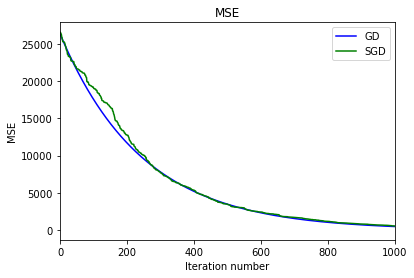

In [78]:
plt.plot(range(len(errors_GD)), errors_GD, color='b', label='GD') # изменение функционала ошибки GD
plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD') # изменение функционала ошибки SGD

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend();

In [79]:
#сохраняем изменения весеов в архив для построения графика
weights_GD = np.array(w_list_GD)
weights_SGD = np.array(w_list_SGD)

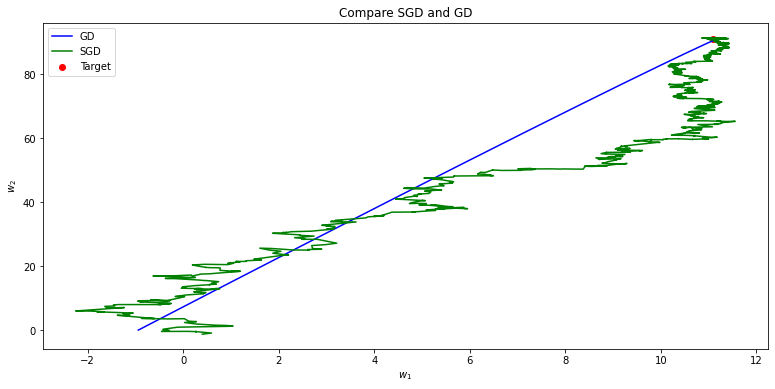

In [81]:
#визуализируем изменение весов
#красная точка - истинный вес
plt.figure(figsize=(13, 6))
plt.title('Compare SGD and GD')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')


plt.plot(weights_GD[:, 0], weights_GD[:, 1], color='b', label='GD')
plt.plot(weights_SGD[:, 0], weights_SGD[:, 1], color='g', label='SGD')
plt.scatter(coef[0], coef[1], c='r', label='Target')

plt.legend()
plt.show()